# 38616 - HW1: Implement a Neural Network with Pytorch

Natalie Pham

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from typing import Optional, List, Tuple, Dict


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [2]:
class SingleLayerMLP(nn.Module):
    """constructing a single layer neural network with Pytorch"""
    def __init__(self, indim, outdim, hidden_layer=100):
        super(SingleLayerMLP, self).__init__()
        self.hidden_layer = nn.Linear(indim, hidden_layer)
        self.output = nn.Linear(hidden_layer, outdim)
        self.activation = nn.ReLU()
        # raise NotImplementedError()


    def forward(self, x):
        """
        x shape (batch_size, input_dim)
        """
        x = x.to(self.hidden_layer.weight.dtype)
        hidden = self.hidden_layer(x)
        activate = self.activation(hidden)
        output = self.output(activate)
        return output

class TwoLayerMLP(nn.Module):
    """constructing a single layer neural network with Pytorch"""
    def __init__(self, indim, outdim, hidden_layer=100):
        super(TwoLayerMLP, self).__init__()
        self.hidden_layer1 = nn.Linear(indim, hidden_layer)
        self.hidden_layer2 = nn.Linear(hidden_layer, hidden_layer)
        self.output = nn.Linear(hidden_layer, outdim)
        self.activation = nn.ReLU()
        # raise NotImplementedError()


    def forward(self, x):
        """
        x shape (batch_size, input_dim)
        """
        x = x.to(self.hidden_layer1.weight.dtype)
        hidden = self.hidden_layer1(x)
        hidden = self.hidden_layer2(hidden)
        activate = self.activation(hidden)
        output = self.output(activate)
        return output


class DS(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray):
        self.length = len(X)
        self.X = X
        self.Y = Y

    def __getitem__(self, idx):
        x = self.X[idx, :]
        y = self.Y[idx]
        return (x, y)

    def __len__(self):
        return self.length


def validate(model, loader, loss_fnc, optimizer):
    """takes in a dataloader, then returns the model loss and accuracy on this loader"""
    
    with torch.no_grad():
        total_loss = 0
        total_correct = 0
        total_samples = 0
        
        model.eval()
        for x, y in loader:
            x, y = x.to(device), y.to(device).long()
            outputs = model(x)
            loss = loss_fnc(outputs, y)
            total_loss += loss.item() * x.shape[0]
            predictions = outputs.argmax(dim=1)
            total_correct += (predictions == y).sum().item()
            total_samples += x.shape[0]
            
        # Calculate the average loss and accuracy
        average_loss = total_loss / total_samples
        average_accuracy = total_correct / total_samples

        return average_loss, average_accuracy


def train(model, train_loader, criterion, optimizer):
    total_loss = 0
    total_correct = 0
    total_samples = 0
    
    model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device).long()
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.shape[0]
        predictions = outputs.argmax(dim=1)
        total_correct += (predictions == y).sum().item()
        total_samples += x.shape[0]

    # Calculate the average loss and accuracy
    average_loss = total_loss / total_samples
    average_accuracy = total_correct / total_samples

    return average_loss, average_accuracy

In [3]:
if __name__ == "__main__":
    """The dataset loaders were provided for you.
    You need to implement your own training process.
    You need plot the loss and accuracies during the training process and test process. 
    """


    indim = 10
    outdim = 2
    hidden_dim = 100
    lr = 0.01
    batch_size = 64
    epochs = 100

    #dataset
    Xtrain = np.loadtxt("data/XTrain.txt", delimiter="\t")
    Ytrain = np.loadtxt("data/yTrain.txt", delimiter="\t").astype(int)
    m1, n1 = Xtrain.shape
    print(m1, n1)
    train_ds = DS(Xtrain, Ytrain)
    train_loader = DataLoader(train_ds, batch_size=batch_size)

    Xtest = np.loadtxt("data/XTest.txt", delimiter="\t")
    Ytest = np.loadtxt("data/yTest.txt", delimiter="\t").astype(int)
    m2, n2 = Xtest.shape
    print(m1, n2)
    test_ds = DS(Xtest, Ytest)
    test_loader = DataLoader(test_ds, batch_size=batch_size)

    #construct the model
    model = TwoLayerMLP(indim, outdim, hidden_dim).to(device)

    # Define the loss function
    loss_fnc = nn.CrossEntropyLoss()

    # Define the optimizer
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    #construct the training process
    train_losses, train_accs, test_losses, test_accs = [], [], [], []
    for epoch in range(epochs):
        # Train the model
        train_loss, train_acc = train(model, train_loader, loss_fnc, optimizer)
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Evaluate the model on the test set
        test_loss, test_acc = validate(model, test_loader, loss_fnc, optimizer)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        # Print the results for this epoch
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}, Test Loss={test_loss:.4f}, Test Acc={test_acc:.4f}")

500 10
500 10
Epoch 1: Train Loss=0.6907, Train Acc=0.5400, Test Loss=0.6570, Test Acc=0.6100
Epoch 2: Train Loss=0.6403, Train Acc=0.6700, Test Loss=0.6079, Test Acc=0.7500
Epoch 3: Train Loss=0.5968, Train Acc=0.7900, Test Loss=0.5646, Test Acc=0.8500
Epoch 4: Train Loss=0.5579, Train Acc=0.8800, Test Loss=0.5255, Test Acc=0.8950
Epoch 5: Train Loss=0.5226, Train Acc=0.9080, Test Loss=0.4900, Test Acc=0.9150
Epoch 6: Train Loss=0.4904, Train Acc=0.9280, Test Loss=0.4576, Test Acc=0.9100
Epoch 7: Train Loss=0.4607, Train Acc=0.9340, Test Loss=0.4281, Test Acc=0.9100
Epoch 8: Train Loss=0.4334, Train Acc=0.9300, Test Loss=0.4013, Test Acc=0.9150
Epoch 9: Train Loss=0.4085, Train Acc=0.9320, Test Loss=0.3771, Test Acc=0.9150
Epoch 10: Train Loss=0.3858, Train Acc=0.9340, Test Loss=0.3553, Test Acc=0.9150
Epoch 11: Train Loss=0.3652, Train Acc=0.9320, Test Loss=0.3360, Test Acc=0.9150
Epoch 12: Train Loss=0.3467, Train Acc=0.9320, Test Loss=0.3187, Test Acc=0.9200
Epoch 13: Train Loss=0.

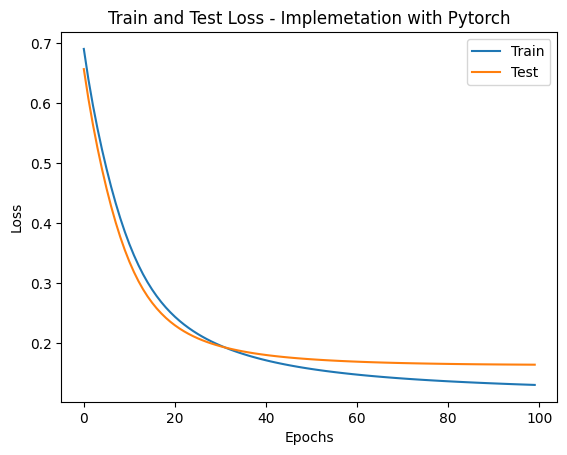

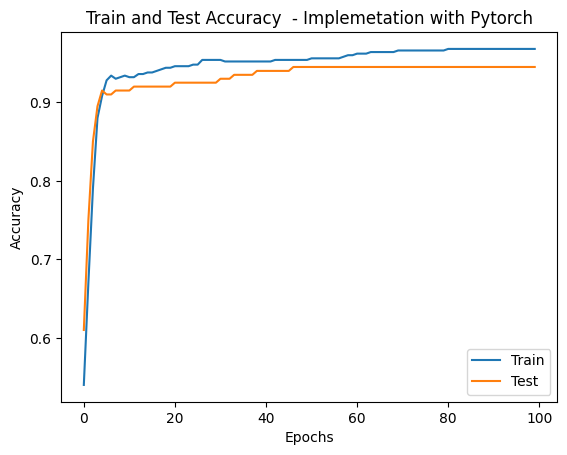

In [5]:
# plot training and testing losses
plt.plot(np.arange(epochs), np.array(train_losses), label="Train")
plt.plot(np.arange(epochs), np.array(test_losses), label="Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Train and Test Loss - Implemetation with Pytorch')
plt.legend()
plt.savefig('nn_pytorch_loss2.png')
plt.show()

# plot training and testing accuracies
plt.plot(np.arange(epochs), np.array(train_accs), label="Train")
plt.plot(np.arange(epochs), np.array(test_accs), label="Test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Train and Test Accuracy  - Implemetation with Pytorch')
plt.legend()
plt.savefig('nn_pytorch_acc2.png')
plt.show()
